## PCA exercise

In this notebook, you'll apply PCA to both a dataset of fruit images and a "mystery" dataset to see what you can learn about either.

One of the takeaways of this exercise and those that follow is that, with real data, you often have to try multiple methods/techniques to understand your data!

### Getting our datasets

First, lets load in our datasets. You can start with the code provided here to load in your data in each of the exercise notebooks.

For our fruit data, we will load pictures of apples and pictures of bananas with JuliaDB.

In [1]:
using JuliaDB, MNIST 

In [2]:
fruit_table = loadtable(["../training/data/Apple_Golden_1.dat","../training/data/bananas.dat"]; delim = '\t',
              filenamecol=:apple => (x) -> x=="../training/data/Apple_Golden_1.dat" ? true : false)

Table with 982 rows, 6 columns:
apple  height_  width_  red_      green_    blue
────────────────────────────────────────────────────
true   94       99      0.708703  0.641282  0.341998
true   94       99      0.648376  0.553169  0.284163
true   94       99      0.647237  0.553302  0.282579
true   94       99      0.647963  0.55323   0.283689
true   94       99      0.647653  0.554047  0.2846
true   94       99      0.648491  0.553821  0.28597
true   94       99      0.647974  0.554518  0.285646
true   94       99      0.649307  0.554399  0.287323
true   95       99      0.648141  0.554708  0.286103
true   94       99      0.64984   0.555665  0.288396
true   94       99      0.648446  0.555576  0.287733
true   93       99      0.709808  0.632473  0.322328
⋮
false  37       99      0.528731  0.456548  0.230871
false  37       99      0.524028  0.452379  0.226256
false  37       99      0.523906  0.452571  0.230475
false  39       99      0.523823  0.4514    0.229759
false  39       99 

And now let's convert the columns of this `JuliaDB` table to a `Matrix`.

In [32]:
matdata = hcat(columns(fruit_table)...)

982×6 Array{Float64,2}:
 1.0  94.0  99.0  0.708703  0.641282  0.341998
 1.0  94.0  99.0  0.648376  0.553169  0.284163
 1.0  94.0  99.0  0.647237  0.553302  0.282579
 1.0  94.0  99.0  0.647963  0.55323   0.283689
 1.0  94.0  99.0  0.647653  0.554047  0.2846  
 1.0  94.0  99.0  0.648491  0.553821  0.28597 
 1.0  94.0  99.0  0.647974  0.554518  0.285646
 1.0  94.0  99.0  0.649307  0.554399  0.287323
 1.0  95.0  99.0  0.648141  0.554708  0.286103
 1.0  94.0  99.0  0.64984   0.555665  0.288396
 1.0  94.0  99.0  0.648446  0.555576  0.287733
 1.0  93.0  99.0  0.709808  0.632473  0.322328
 1.0  94.0  99.0  0.650164  0.555766  0.290677
 ⋮                                    ⋮       
 0.0  31.0  99.0  0.52913   0.44031   0.203179
 0.0  37.0  99.0  0.528731  0.456548  0.230871
 0.0  37.0  99.0  0.524028  0.452379  0.226256
 0.0  37.0  99.0  0.523906  0.452571  0.230475
 0.0  39.0  99.0  0.523823  0.4514    0.229759
 0.0  39.0  99.0  0.522489  0.449973  0.233683
 0.0  41.0  99.0  0.517573  0.444391

In [33]:
rescale(A, dim::Integer=1) = (A .- mean(A, dim)) ./ max.(std(A, dim), eps())

rescale (generic function with 2 methods)

In [34]:
fruit_data = rescale(matdata, 1)[:, 2:end]

982×5 Array{Float64,2}:
  0.65992   0.348836   1.13532    1.4451     1.79973 
  0.65992   0.348836   0.339241   0.261184   0.592606
  0.65992   0.348836   0.324211   0.262979   0.559557
  0.65992   0.348836   0.333794   0.262012   0.582723
  0.65992   0.348836   0.329709   0.272989   0.601723
  0.65992   0.348836   0.340757   0.269948   0.630321
  0.65992   0.348836   0.333936   0.27932    0.623567
  0.65992   0.348836   0.351532   0.277722   0.65857 
  0.698588  0.348836   0.336145   0.281866   0.633091
  0.65992   0.348836   0.35857    0.294727   0.680955
  0.65992   0.348836   0.340169   0.293531   0.667123
  0.621252  0.348836   1.1499     1.32674    1.38918 
  0.65992   0.348836   0.36284    0.296077   0.728573
  ⋮                                                  
 -1.77618   0.348836  -1.23432   -1.25521   -1.09768 
 -1.54417   0.348836  -1.23959   -1.03704   -0.519685
 -1.54417   0.348836  -1.30165   -1.09304   -0.616013
 -1.54417   0.348836  -1.30326   -1.09047   -0.527968
 -1.

Use the first column of `fruit_table` to create an `Array` called `fruit_labels` that stores the string "Apple" for entries that are `true` and "Banana" for entries that are `false`.

#### Solution:

In [35]:
fruit_labels = ifelse.(matdata[:,1].==1, "Apple","Banana")

982-element Array{String,1}:
 "Apple" 
 "Apple" 
 "Apple" 
 "Apple" 
 "Apple" 
 "Apple" 
 "Apple" 
 "Apple" 
 "Apple" 
 "Apple" 
 "Apple" 
 "Apple" 
 "Apple" 
 ⋮       
 "Banana"
 "Banana"
 "Banana"
 "Banana"
 "Banana"
 "Banana"
 "Banana"
 "Banana"
 "Banana"
 "Banana"
 "Banana"
 "Banana"

The variable `fruit_data` is bound to an array with columns for each of 5 values describing our fruit images, and `fruit_labels` is an array storing labels for the corresponding images, indicating whether that picture was of an apple or a banana. We will use these labels to visualize how ML techniques change and preserve our data.

Our mystery dataset is pulled in as follows:

In [16]:
mystery_data, labels = traindata()

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [5.0, 0.0, 4.0, 1.0, 9.0, 2.0, 1.0, 3.0, 1.0, 4.0  …  9.0, 2.0, 9.0, 5.0, 1.0, 8.0, 3.0, 5.0, 6.0, 8.0])

In [17]:
N = 2500
mystery_data = rescale(convert(Matrix{Float64}, mystery_data[:, 1:N])',1)
println(size(data))

(2500, 784)


In [18]:
mystery_labels = Int.(labels)[1:N];

This dataset has 2500 observations of 784 dimensions each as the variable `mystery_data`. The variable `mystery_labels` are the true groupings in this dataset, and we will to see if we find those true groupings organically.

### Explore the dataset

Before we apply PCA or any other techniques to our mystery data set, let's try to get a feel for what our data set looks like.

We have five features in our data set. Can we use the raw data for these five features to distinguish apples from bananas?

Plot each pairwise combination of features from the dataset to see if we can tell the difference between apples and bananas. (For example, plot height vs. width.)

You may want to use the `group = fruit_labels` keyword argument to `scatter` from the `Plots` package to visualize apple vs. banana data points.

#### Solution:

In [36]:
columnnames = ["height", "width", "red", "green", "blue"]
using Plots
gr()
store_plots = []
for i in 1:5
    for j in (i + 1):5
        p = scatter(fruit_data[:, i], fruit_data[:, j], group = fruit_labels, markersize=2)
        xlabel!(p, columnnames[i])
        ylabel!(p, columnnames[j])
        push!(store_plots, p)
    end
end

In [37]:
plot(store_plots..., legend = false)

You should see that we should be able to use colors to distinguish apples and bananas, but let's use PCA to see if we can do any better!

### Apply Principal Components Analysis

Let's start by performing a Principle Components Analysis of our data. On our fruit data, use the function `fit` with the model `PCA` from the `MultivariateStats` pacakge to tell it to create a PCA model.

How many output dimensions do you need to describe your dataset with 90% accuracy? 95% accuracy? 99%?

#### Solution:

In [95]:
using MultivariateStats
M = fit(PCA, fruit_data', maxoutdim = 4)

# You need 4 output dimensions for 99% predictive ability, 3 output dimensions for at least 95% predictive ability, and 2 output dimensions for at least 90%

PCA(indim = 5, outdim = 4, principalratio = 0.99930)

Let's keep as many dimensions as we need for at least 99%  predictive of our real dataset. This way we can lose a dimension without losing much explainability!

Transform `fruit_data` to `fruit_PCA` using the model you get from `fit`. Demonstrate that you're able to reconstruct `fruit_data` from `fruit_PCA`.

#### Solution

In [96]:
fruit_PCA = transform(M, fruit_data')'

982×4 Array{Float64,2}:
 -2.58673   -0.302278   -0.304531  0.521877
 -0.914594  -0.0600109   0.422327  0.266091
 -0.890645  -0.0592248   0.432012  0.24483 
 -0.907081  -0.0596686   0.425313  0.260052
 -0.920497  -0.0598259   0.418789  0.273848
 -0.939387  -0.0599934   0.411143  0.29359 
 -0.937304  -0.0605121   0.411396  0.287902
 -0.96372   -0.061648    0.400766  0.309589
 -0.96055   -0.0429054   0.438409  0.29179 
 -0.987989  -0.0642463   0.38994   0.319333
 -0.970497  -0.0617616   0.396618  0.316355
 -2.30526   -0.322017   -0.212372  0.218732
 -1.01536   -0.0632283   0.377975  0.35624 
  ⋮                                        
  2.59285   -0.799029   -0.422639  0.196526
  2.08827   -0.698487   -0.429776  0.589747
  2.20042   -0.684774   -0.38219   0.555977
  2.15481   -0.681426   -0.40268   0.62833 
  2.13975   -0.643773   -0.33444   0.617411
  2.11737   -0.635131   -0.344996  0.698863
  2.23126   -0.584124   -0.221705  0.633259
  2.22615   -0.573514   -0.224426  0.708559
  2.1450

In [99]:
reconstructed_fruit = reconstruct(M, fruit_PCA')'

982×5 Array{Float64,2}:
  0.652131  0.34404    1.246      1.3295     1.81215 
  0.662301  0.350302   0.305402   0.296527   0.588808
  0.661614  0.349879   0.300141   0.288119   0.556855
  0.662054  0.35015    0.303472   0.293682   0.579319
  0.661606  0.349874   0.305745   0.298019   0.599033
  0.662188  0.350232   0.308532   0.303607   0.626703
  0.661608  0.349876   0.30994    0.304383   0.620873
  0.662382  0.350352   0.316546   0.314264   0.654643
  0.700207  0.349832   0.313145   0.305888   0.630509
  0.662108  0.350183   0.327475   0.327206   0.677464
  0.661484  0.349799   0.317936   0.316752   0.664628
  0.616626  0.345988   1.21564    1.25808    1.39656 
  0.662382  0.350352   0.327856   0.332617   0.724646
  ⋮                                                  
 -1.77407   0.350137  -1.26435   -1.22385   -1.10105 
 -1.54821   0.346347  -1.18215   -1.09703   -0.513236
 -1.54869   0.346052  -1.2374    -1.16015   -0.608801
 -1.54851   0.346167  -1.24165   -1.15481   -0.521052
 -1.

Overlay a plot of fruit_data and fruit_labels, for a pair of features, to see if your data has changed much during transformation and reconstruction.

For fun, see how this overlay changes as you decrease the number of output dimensions in your model.

#### Solution

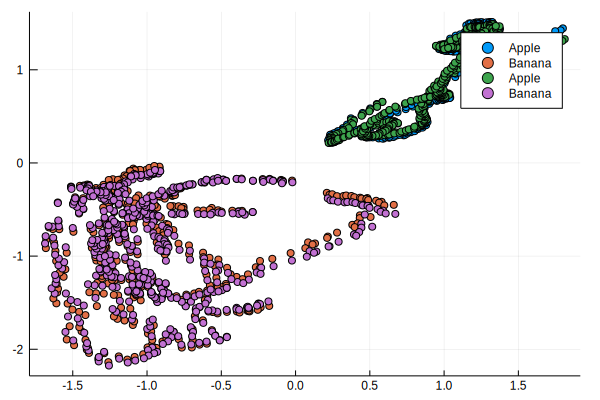

In [100]:
scatter(fruit_data[:, 5], fruit_data[:, 4], group = fruit_labels)
scatter!(reconstructed_fruit[:, 5], reconstructed_fruit[:, 4], group = fruit_labels)

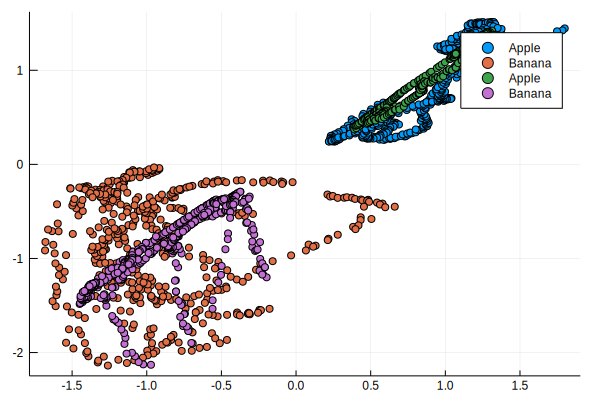

In [101]:
# Same as above, but with two output dimensions

M = fit(PCA, fruit_data', maxoutdim = 2)
fruit_PCA = transform(M, fruit_data')'
reconstructed_fruit = reconstruct(M, fruit_PCA')'
scatter(fruit_data[:, 5], fruit_data[:, 4], group = fruit_labels)
scatter!(reconstructed_fruit[:, 5], reconstructed_fruit[:, 4], group = fruit_labels)

Now that we have dimensionally reduced data, let's plot the principle components. 

When we explored our untransformed dataset, we tried plotting each possible pairing of features to determine how we might distinguish apples form bananas. We shouldn't have to do this brute force search of features now that we've done PCA.

Plot the principal component(s) most likely to show variation in the data.

#### Solution

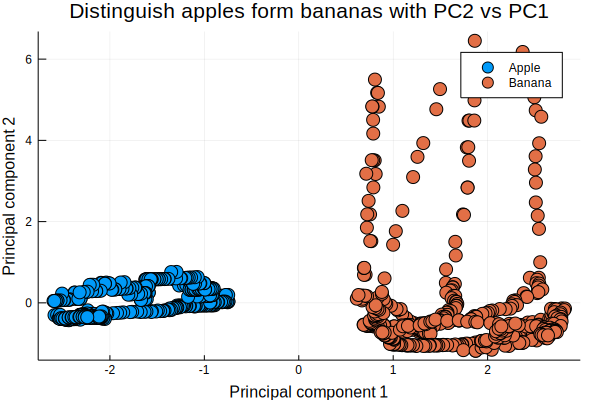

In [103]:
# We could plot the two most important principal components against one another
scatter(fruit_PCA[:,1], fruit_PCA[:,2], group = fruit_labels, markersize=7)
xlabel!("Principal component 1")
ylabel!("Principal component 2")
title!("Distinguish apples form bananas with PC2 vs PC1")

Notice that these give nice pictures that show that the apple and banana pictures are very distinct. In fact, a PCA to two components shows that these two axes capture 90% of our data variation

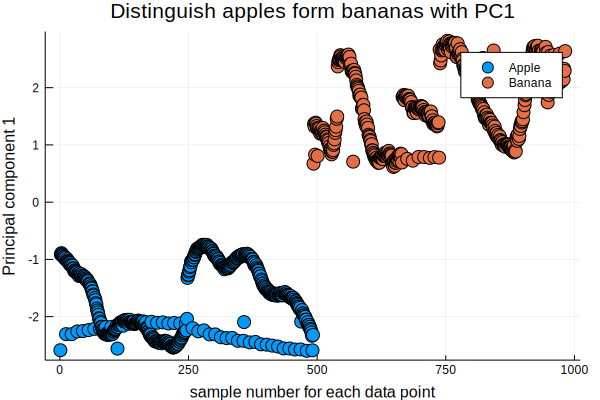

In [105]:
# Or we could simply plot the most important principal component
scatter(fruit_PCA[:,1], group = fruit_labels, markersize=7)
ylabel!("Principal component 1")
xlabel!("sample number for each data point")
title!("Distinguish apples form bananas with PC1")

### What about our secret data?

Let's now do the same analysis on our secret data.

Try this without specifying the number of output dimensions. How many do you get?

Then try with only two output dimensions? How high is your `principalratio`?

Are you able to learn much from PCA on this dataset?

#### Solution

In [109]:
M1 = fit(PCA, mystery_data')

PCA(indim = 784, outdim = 428, principalratio = 0.99009)

Here it shows that it can approximate our 784 dimensional data with 428 dimensions. That's still very high. What happens when we ask for two?

In [110]:
M2 = fit(PCA, mystery_data', maxoutdim = 2)

PCA(indim = 784, outdim = 2, principalratio = 0.10965)

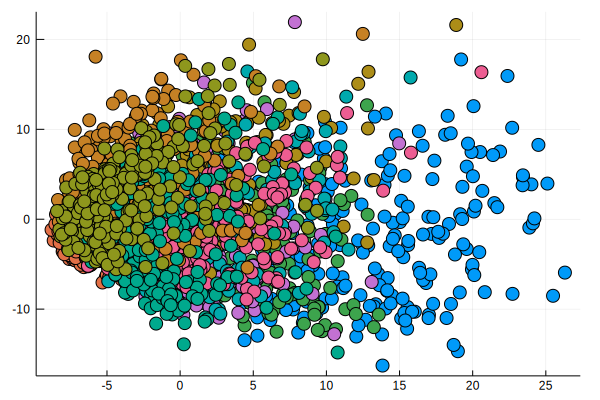

In [113]:
mystery_PCA = transform(M1, mystery_data')';
scatter(mystery_PCA[:,1],mystery_PCA[:,2], legend=false, markersize=7, group = mystery_labels)

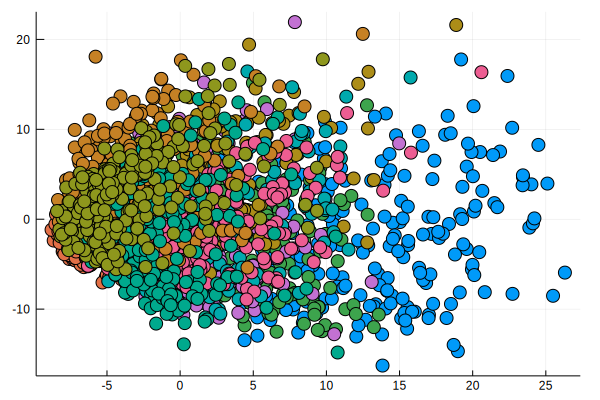

In [114]:
mystery_PCA2 = transform(M2, data')'
scatter(mystery_PCA2[:,1],mystery_PCA2[:,2], legend=false, markersize=7, group = mystery_labels)

Our data looks very muddled together. PCA is not applicable to all datasets, and this appears to be one. Let's try the other techniques then!